In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

In [2]:
df = pd.read_csv('../../Data/Chapter_1_cleaned_data.csv')

In [3]:
features_response = df.columns.tolist()

In [4]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [5]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [7]:
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values,
                 df['default payment next month'].values,
                 test_size=0.2, random_state=24)

# Exercise 5.02: Finding Optimal Hyperparameters for a Decision Tree

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
X_train.shape

(21331, 17)

In [10]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}
# params = {'max_depth':list(range(1,13))}

In [11]:
dt = tree.DecisionTreeClassifier()

In [15]:
# cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
#                   n_jobs=None, refit=True, cv=4, verbose=1,
#                   pre_dispatch=None, error_score=np.nan,
#                   return_train_score=True)

cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=4, verbose=1,
                  error_score=np.nan,
                  return_train_score=True)

In [16]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [14]:
# cv.cv_results_

In [17]:
cv_results_df = pd.DataFrame(cv.cv_results_)

In [18]:
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.037231,0.003216,0.004133,0.000220,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.068094,0.002964,0.003769,0.000556,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.165040,0.065433,0.004021,0.000343,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.180029,0.023048,0.004013,0.000791,6,{'max_depth': 6},0.744076,0.745998,0.752069,0.740614,0.745689,0.004158,1,0.782202,0.780125,0.775228,0.774776,0.778083,0.003171
4,0.266834,0.018538,0.004783,0.000562,8,{'max_depth': 8},0.727339,0.731737,0.748768,0.730471,0.734579,0.008347,3,0.811958,0.808353,0.803415,0.802048,0.806443,0.003955
5,0.268160,0.008494,0.003772,0.000557,10,{'max_depth': 10},0.707536,0.699936,0.717739,0.712719,0.709483,0.006587,4,0.849402,0.853998,0.841352,0.836300,0.845263,0.006875
6,0.272572,0.012470,0.004380,0.001641,12,{'max_depth': 12},0.673260,0.660151,0.672975,0.678906,0.671323,0.006870,6,0.890428,0.903088,0.885939,0.875446,0.888725,0.009916


In [19]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

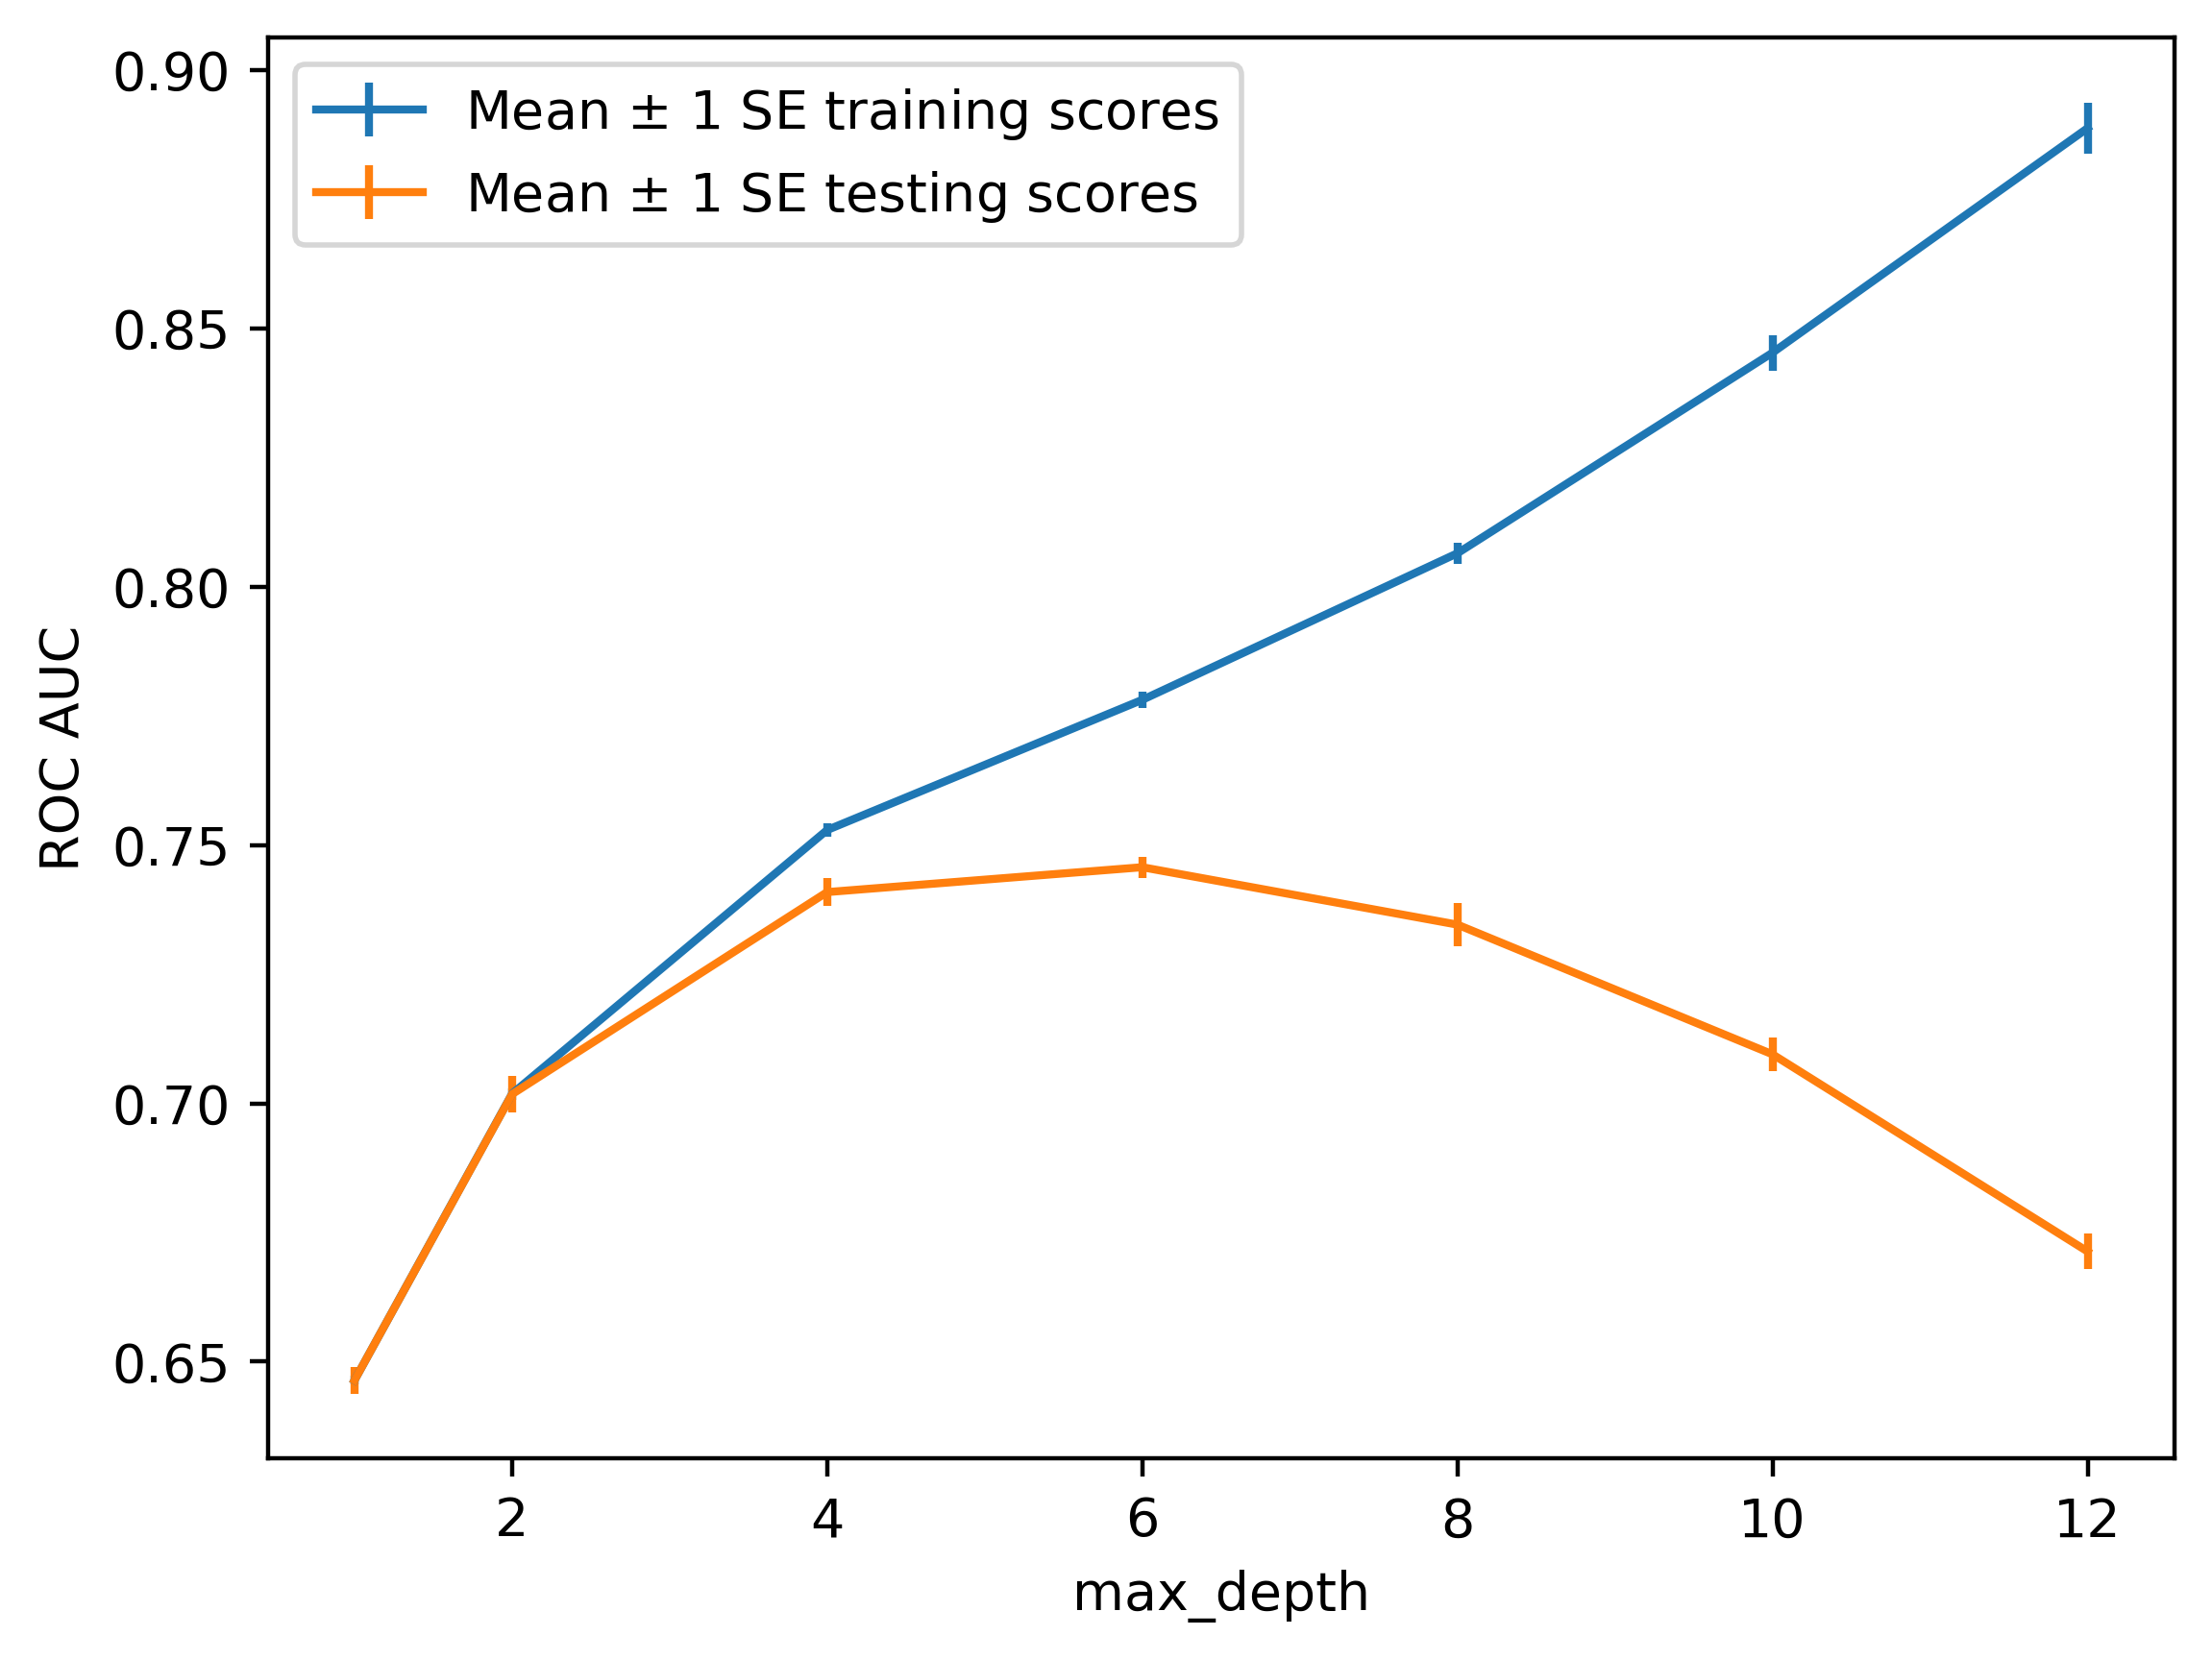

In [20]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [23]:
cv_results_df["mean_train_score"].max()

0.8887250419098468